# Text Mining and Search

UniMiB 2022/23

**IMDB Reviews**

In [1]:
# initial imports

import io
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import joblib

Merge data - Train

In [ ]:
train_dataset = pd.DataFrame(columns=['text','sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/train/neg/')):
  with io.open('../data/raw/train/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/train/pos/')):
  with io.open('../data/raw/train/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'POS']
            

In [ ]:
train_dataset.to_csv('../data/train_dataset.csv')

Merge data - Test

In [ ]:
test_dataset = pd.DataFrame(columns=['text', 'sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/test/neg/')):
  with io.open('../data/raw/test/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/test/pos/')):
  with io.open('../data/raw/test/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'POS']


In [ ]:
test_dataset.to_csv('../data/test_dataset.csv')

Read data

In [ ]:
train = pd.read_csv('../data/train_dataset.csv')
train = train[['text', 'sentiment']]
train.head()

In [ ]:
test = pd.read_csv('../data/test_dataset.csv')
test = test[['text', 'sentiment']]
test.head()

### Text Pre-Processing

In [2]:
import string
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

from preprocess import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

# function to remove all the numbers from the text
def remove_numbers(text_to_preprocess):
    return re.sub(r'\d+', '', text_to_preprocess)

# function to remove all the punctuation marks from the text
def remove_punctuation(text):
    return text[0].translate(str.maketrans('', '', string.punctuation))

# function to remove all the stopwords from the text
def remove_stopwords(text):
    no_stopwords = ''
    for item in text.split():
      if item not in stopwords.words():
        no_stopwords+=' '+item
    return no_stopwords

# function to find the Part-Of-Speech tags for the words in the text
def postagger(token_words):
    return nltk.pos_tag(token_words)

# function to remove extra whitespaces from the text
def remove_extra_whitespace(text):
    return " ".join(text.split())

# function to tokenize the text into words
def tokenizer(text):
  return word_tokenize(text)

# function to lemmatize the tokenized words
def lemmatizer_function(tokenized_text):
  lemmatized_text= ''
  for token in tokenized_text:
    lemmatized = lemmatizer.lemmatize(token)
    lemmatized_text += ' '+lemmatized
  return lemmatized_text


# function to preprocess the text by lowercasing, removing numbers, punctuation, stopwords, extra whitespaces and lemmatizing
def preprocess_text(text):
    text = text.str.lower()
    no_nums = remove_numbers(text),
    no_punct = remove_punctuation(no_nums)
    no_stopw = remove_stopwords(no_punct)
    no_whtspace = remove_extra_whitespace(no_stopw)
    tokenized = tokenizer(no_whtspace)
    lemmatized = lemmatizer_function(tokenized)
    return lemmatized

In [ ]:
from multiprocessing import Pool
from preprocess import preprocess_loader
if __name__ == '__main__':
  df_split = np.array_split(train_ds, 10)
  pool = Pool(10)
  df = pd.concat(pool.map(preprocess_loader, df_split))
  pool.close()
  pool.join()

In [ ]:
tqdm.pandas()

train['preprocessed_text'] = train['text'].progress_apply(preprocess_text)
train.head()

### Data Exploration

In [3]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
train_pp = train_pp[['text', 'sentiment', 'preprocessed_text']]
train_pp.head()

,text,sentiment,preprocessed_text
0,Story of a man who has unnatural feelings for ...,NEG,story unnatural feeling pig start opening sce...
1,Airport '77 starts as a brand new luxury 747 p...,NEG,airport start brand luxury plane loaded valua...
2,This film lacked something I couldn't put my f...,NEG,film lacked put finger charisma part leading ...
3,"Sorry everyone,,, I know this is supposed to b...",NEG,sorry supposed art film wow handed gun screen...
4,When I was little my parents took me along to ...,NEG,parent theater interior movie watched parent ...


In [4]:
test_pp = pd.read_csv('../data/preprocessed_test.csv')
test_pp = test_pp[['text', 'sentiment', 'preprocessed_text']]
test_pp.head()

,text,sentiment,preprocessed_text
0,Once again Mr. Costner has dragged out a movie...,NEG,mr costner dragged movie longer terrific resc...
1,This is an example of why the majority of acti...,NEG,majority action film generic boring worth wat...
2,"First of all I hate those moronic rappers, who...",NEG,hate moronic rapper act gun pressed forehead ...
3,Not even the Beatles could write songs everyon...,NEG,beatles write song walter hill moptop he prov...
4,Brass pictures (movies is not a fitting word f...,NEG,brass picture movie fitting word brassy allur...


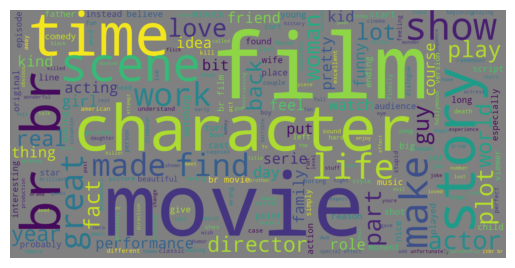

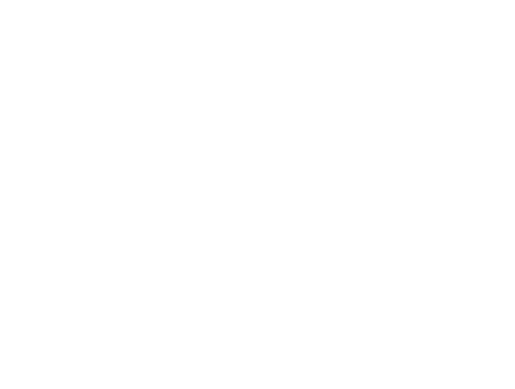

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# get the text and join all the reviews in training set
# creating the text variable
text = " ".join(cat for cat in train_pp.preprocessed_text)

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("english")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("../figures/WordCloud_train.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

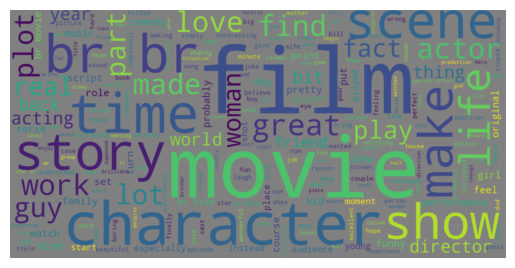

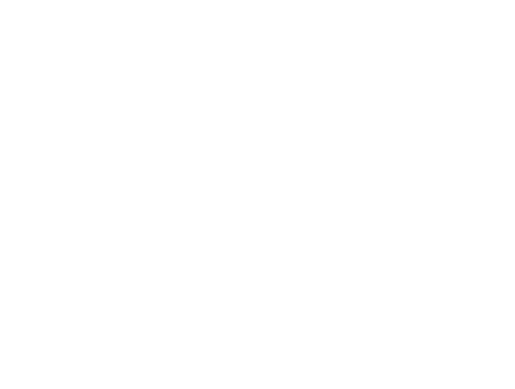

In [6]:
# get the text and join all the reviews in test set
# creating the text variable
text = " ".join(cat for cat in test_pp.preprocessed_text)

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("english")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("../figures/WordCloud_test.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [7]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(train_pp.preprocessed_text))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in train_pp.preprocessed_text]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
24902

Average review length:
Mean 685.01 words (545.460708)


In [8]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(test_pp.preprocessed_text))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in test_pp.preprocessed_text]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
24798

Average review length:
Mean 668.02 words (532.623695)


### Text Representation

In [9]:
from sklearn.feature_extraction.text import CountVectorizer      #-- Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer      #-- Tf-Idf

import joblib

In [10]:
text_preprocessed_train = train_pp['preprocessed_text']
text_preprocessed_test = test_pp['preprocessed_text']

Bag-of-Word (BoW)

In [11]:
vectorizer_bow = CountVectorizer(ngram_range=(1,3),                     #-- Uni-grams, Bi-grams, and Tri-grams
                                    max_features=10000)                 #-- Most frequent 10000 grams across the text

X_text_bow = vectorizer_bow.fit_transform(text_preprocessed_train).toarray()
y_text_bow = vectorizer_bow.transform(text_preprocessed_test).toarray()

In [12]:
print(X_text_bow.shape)
print(y_text_bow.shape)

(25000, 10000)
(25000, 10000)


In [13]:
joblib.dump(X_text_bow, 'processed_train_bow.save')

['processed_train_bow.save']

In [14]:
joblib.dump(y_text_bow, 'processed_test_bow.save')

['processed_test_bow.save']

Tf-Idf

In [15]:
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,3),                #-- Uni-grams, Bi-grams, and Tri-grams
                                    max_features=10000)              #-- Most frequent 10000 grams across the text

X_text_tfidf = vectorizer_tfidf.fit_transform(text_preprocessed_train).toarray()
y_text_tfidf = vectorizer_tfidf.transform(text_preprocessed_test).toarray()

In [16]:
print(X_text_tfidf.shape)
print(y_text_tfidf.shape)

(25000, 10000)
(25000, 10000)


In [17]:
joblib.dump(X_text_tfidf, 'processed_train_tfidf.save')

['processed_train_tfidf.save']

In [18]:
joblib.dump(y_text_tfidf, 'processed_test_tfidf.save')

['processed_test_tfidf.save']

### Text Classification

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import joblib
from sklearn.preprocessing import LabelEncoder

In [20]:
labels_train = train_pp['sentiment']

encoder = LabelEncoder()
encoder.fit(labels_train)
encoded_labels_train = encoder.transform(labels_train)

In [21]:
labels_test = test_pp['sentiment']

encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)

In [22]:
X_text_bow = joblib.load('processed_train_bow.save')
X_text_tfidf = joblib.load('processed_train_tfidf.save')

In [23]:
y_text_bow = joblib.load('processed_test_bow.save')
y_text_tfidf = joblib.load('processed_test_tfidf.save')

Support Vector Machines (SVM)

In [24]:
from sklearn.svm import LinearSVC

In [25]:
clf_bow = LinearSVC(C=0.001)

In [26]:
clf_bow.fit(X_text_bow, encoded_labels_train)

LinearSVC(C=0.001)

In [27]:
preds_bow = clf_bow.predict(y_text_bow)
print(classification_report(encoded_labels_test, preds_bow))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     12500
           1       0.86      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [28]:
clf_tfidf = LinearSVC(C=0.001)

In [29]:
clf_tfidf.fit(X_text_tfidf, encoded_labels_train)

LinearSVC(C=0.001)

In [30]:
preds_tfidf = clf_tfidf.predict(y_text_tfidf)
print(classification_report(encoded_labels_test, preds_tfidf))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     12500
           1       0.79      0.83      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



Multilayer Perceptron (MLP)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
import scipy

In [32]:
# BoW

inputs = tf.keras.Input(shape=(10000))

x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
prediction = layers.Dense(1, activation="sigmoid")(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint/best_model_bow.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model = tf.keras.Model(inputs, prediction)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"], )

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X_text_bow, encoded_labels_train, test_size=0.2)

In [34]:
history = model.fit(X_train, Y_train, epochs=100,
                    callbacks=[model_checkpoint_callback, callback], validation_data=(X_val, Y_val))

Epoch 1/100
625/625 [==============================] - 14s 21ms/step - loss: 0.3592 - accuracy: 0.8468 - val_loss: 0.2983 - val_accuracy: 0.8740
Epoch 2/100
625/625 [==============================] - 12s 19ms/step - loss: 0.1514 - accuracy: 0.9430 - val_loss: 0.3732 - val_accuracy: 0.8694
Epoch 3/100
625/625 [==============================] - 12s 18ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.5816 - val_accuracy: 0.8650
Epoch 4/100
625/625 [==============================] - 12s 18ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.9320 - val_accuracy: 0.8498


In [35]:
joblib.dump(history, './mlp_train_history.save')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-05 11:57:43         2602
metadata.json                                  2023-02-05 11:57:43           64
variables.h5                                   2023-02-05 11:57:43     15515472


['./mlp_train_history.save']

In [36]:
model.save('./mlp_bow_save')

INFO:tensorflow:Assets written to: ./mlp_bow_save\assets


INFO:tensorflow:Assets written to: ./mlp_bow_save\assets


In [37]:
model = tf.keras.models.load_model('./mlp_bow_save')
preds = model.predict(y_text_bow)
preds = np.round(preds)
predictions = []

for item in preds:
  predictions.append(int(item[0]))

print(classification_report(encoded_labels_test, preds))

782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     12500
           1       0.81      0.88      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



In [38]:
# Tf-Idf

inputs = tf.keras.Input(shape=(10000))

x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
prediction = layers.Dense(1, activation="sigmoid")(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint/best_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model = tf.keras.Model(inputs, prediction)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"], )

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X_text_tfidf, encoded_labels_train, test_size=0.2)

In [40]:
history = model.fit(X_train, Y_train, epochs=100,
          callbacks=[model_checkpoint_callback, callback], validation_data=(X_val, Y_val))

Epoch 1/100
625/625 [==============================] - 15s 22ms/step - loss: 0.3532 - accuracy: 0.8426 - val_loss: 0.2871 - val_accuracy: 0.8836
Epoch 2/100
625/625 [==============================] - 13s 20ms/step - loss: 0.1743 - accuracy: 0.9341 - val_loss: 0.3232 - val_accuracy: 0.8726
Epoch 3/100
625/625 [==============================] - 12s 19ms/step - loss: 0.0763 - accuracy: 0.9711 - val_loss: 0.4546 - val_accuracy: 0.8660
Epoch 4/100
625/625 [==============================] - 12s 20ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.8216 - val_accuracy: 0.8642


In [41]:
joblib.dump(history, './mlp_train_history.save')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-05 11:58:46         2610
metadata.json                                  2023-02-05 11:58:46           64
variables.h5                                   2023-02-05 11:58:46     15515472


['./mlp_train_history.save']

In [42]:
model.save('./mlp_tfidf_save')

INFO:tensorflow:Assets written to: ./mlp_tfidf_save\assets


INFO:tensorflow:Assets written to: ./mlp_tfidf_save\assets


In [43]:
model = tf.keras.models.load_model('./mlp_tfidf_save')
preds = model.predict(y_text_tfidf)
preds = np.round(preds)
predictions = []

for item in preds:
  predictions.append(int(item[0]))

print(classification_report(encoded_labels_test, preds))

782/782 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     12500
           1       0.82      0.86      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [45]:
# training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# fitting the model for Bag of words
lr_bow = lr.fit(X_text_bow, encoded_labels_train)
print(lr_bow)

# fitting the model for tfidf features
lr_tfidf = lr.fit(X_text_tfidf, encoded_labels_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [46]:
# predicting the model for bag of words
lr_bow_predict = lr.predict(y_text_bow)
print(lr_bow_predict)

# predicting the model for tfidf features
lr_tfidf_predict = lr.predict(y_text_tfidf)
print(lr_tfidf_predict)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [47]:
# accuracy score for bag of words
lr_bow_score = accuracy_score(encoded_labels_test, lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

# accuracy score for tfidf features
lr_tfidf_score = accuracy_score(encoded_labels_test, lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.85616
lr_tfidf_score : 0.87072


In [48]:
# classification report for bag of words 
lr_bow_report = classification_report(encoded_labels_test, lr_bow_predict, target_names=['Positive','Negative'])
print(lr_bow_report)

# classification report for tfidf features
lr_tfidf_report = classification_report(encoded_labels_test, lr_tfidf_predict, target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86     12500
    Negative       0.87      0.84      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87     12500
    Negative       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



### Text Clustering

In [49]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
train_pp = train_pp['preprocessed_text']

test_pp = pd.read_csv('../data/preprocessed_test.csv')
test_pp = test_pp['preprocessed_text']

full_dataframe = pd.concat((train_pp, test_pp), axis=0)

In [50]:
full_dataframe.shape

(50000,)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer  # -- Tf-Idf

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2),)

X_train_tfidf = vectorizer.fit_transform(train_pp)
X_test_tfidf = vectorizer.transform(test_pp)

In [52]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, n_iter=100)
data1 = svd.fit_transform(X_train_tfidf)
data2 = svd.fit_transform(X_test_tfidf)

In [53]:
joblib.dump(data1,'./svd_train.save')
joblib.dump(data2,'./svd_test.save')

['./svd_test.save']

In [54]:
data1 = joblib.load("./svd_test.save")
data2 = joblib.load("./svd_train.save")

In [55]:
full_dataset_tfidf = np.concatenate((data1, data2))
full_dataset_tfidf.shape

(50000, 200)

In [56]:
# function for Silhouette coefficient

from sklearn.metrics import silhouette_score

def get_silhouette(labels, data):
  silhouette_avg = silhouette_score(data, labels )
  print(f"Silhouette is equal to {silhouette_avg}")

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def plot_word_cloud_data(data, clusters):
  data_str = [str(x) for x in data]
  datas = {
      'text': data_str,
    'cluster': clusters
  }
  new_data = pd.DataFrame(datas)
  for cluster_num in np.unique(clusters):
    if cluster_num != -1:

      data_to_plot = new_data.loc[new_data['cluster'] == cluster_num]
      print(type(data_to_plot['text'].values.tolist()[0]))
      fullstring = ' '.join(data_to_plot['text'].values)
      wordcloud = WordCloud(max_font_size=50, max_words=100,
                            background_color="white").generate(fullstring)
      plt.figure()
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()

In [59]:
from sklearn.decomposition import PCA
import seaborn as sns

def plot_clustering(points, clusters):
  pca = PCA(2)
  data = pca.fit_transform(points)
  print(data.shape)
  df = pd.DataFrame(data, columns=['x','y'])
  df['cluster'] = clusters
  sns.scatterplot(data=df, x="x", y="y", hue="cluster")

DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
from tqdm import tqdm

clustering = DBSCAN(min_samples=5, eps=.225)
clustering = clustering.fit_predict(full_dataset_tfidf)

filtered_data = []
filtered_labels = []
for index in tqdm(range(0, len(clustering))):
  label = clustering[index]
  if label != -1:
    filtered_data.append(full_dataset_tfidf[index])
    filtered_labels.append(label)

get_silhouette(filtered_labels, filtered_data)

100%|██████████| 50000/50000 [00:00<00:00, 1153339.60it/s]

Silhouette is equal to 0.39075488033983147


In [71]:
joblib.dump(clustering, './clustering_dbscan.save')

['./clustering_dbscan.save']

In [62]:
np.unique(clustering)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

(247, 2)


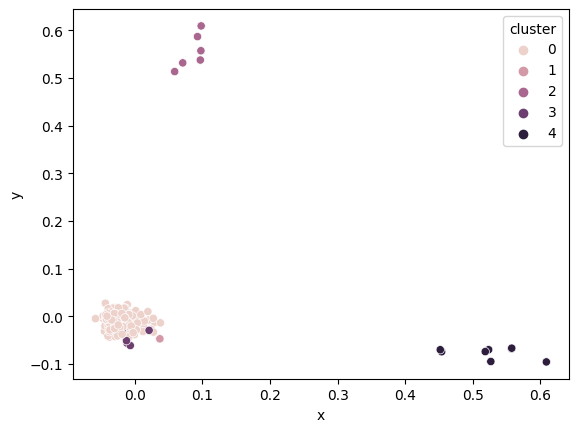

In [63]:
plot_clustering(filtered_data, filtered_labels)

<class 'str'>


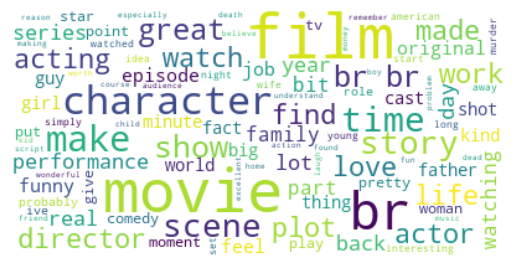

<class 'str'>


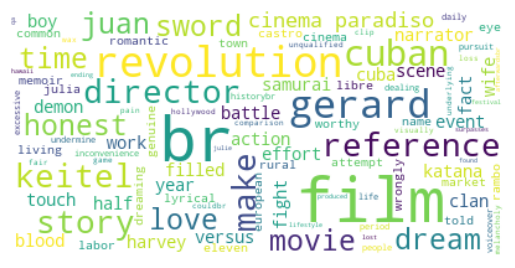

<class 'str'>


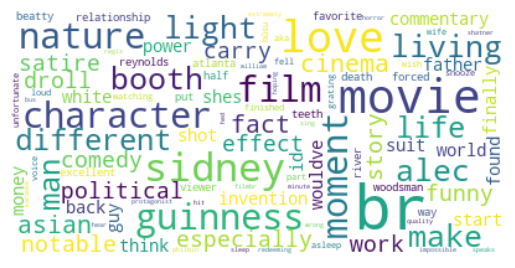

<class 'str'>


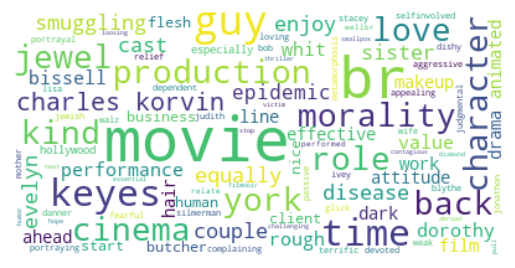

<class 'str'>


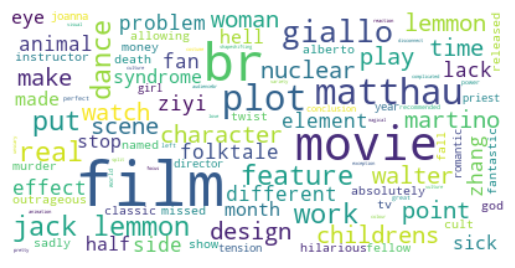

In [64]:
plot_word_cloud_data(full_dataframe.values, clustering)

k-means

In [65]:
from sklearn.cluster import KMeans

In [66]:
kMeans = KMeans(n_clusters=4)
clusters = kMeans.fit_predict(full_dataset_tfidf)
get_silhouette(clusters, full_dataset_tfidf)

c:\Users\FC\miniconda3\envs\text\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette is equal to 0.01721848896639879


In [67]:
joblib.dump(clusters, './clustering_kmeans.save')

['./clustering_kmeans.save']

(50000, 2)


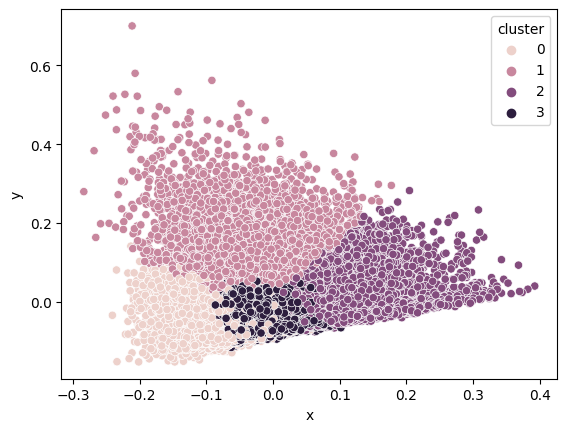

In [68]:
plot_clustering(full_dataset_tfidf, clusters)

In [70]:
np.unique(clusters)

array([0, 1, 2, 3])

<class 'str'>


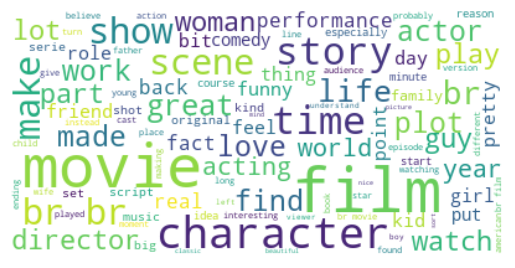

<class 'str'>


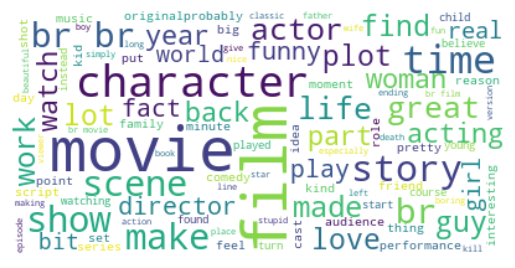

<class 'str'>


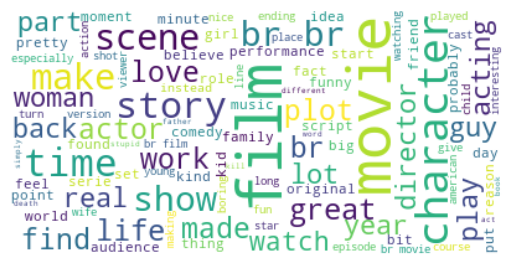

<class 'str'>


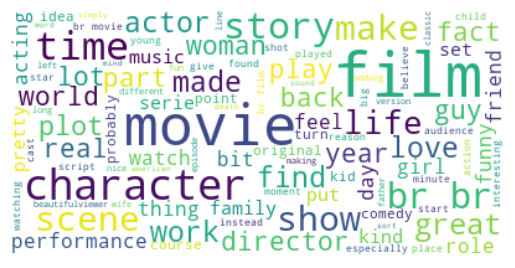

In [69]:
plot_word_cloud_data(full_dataframe, clusters)